<a href="https://colab.research.google.com/github/Riab22209/CE880-Case-Study-repository/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the data from the dataset Data_shipping

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pd.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
filename ="Data_shipping.xlsx"
data = pd.read_excel(filename)
data


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Histogram

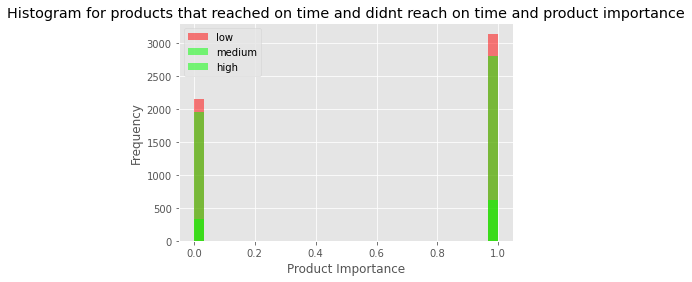

In [13]:
m = plt.hist(data[data["Product_importance"] == "low"].ROT_Y,bins=30,fc = (1,0,0,0.5),label = "low")
b = plt.hist(data[data["Product_importance"] == "medium"].ROT_Y,bins=30,fc = (0,1,0,0.5),label = "medium")
b = plt.hist(data[data["Product_importance"] == "high"].ROT_Y,bins=30,fc = (0,1,0,0.5),label = "high")
plt.legend()
plt.xlabel("Product Importance")
plt.ylabel("Frequency")
plt.title("Histogram for products that reached on time and didnt reach on time and product importance")
plt.show()

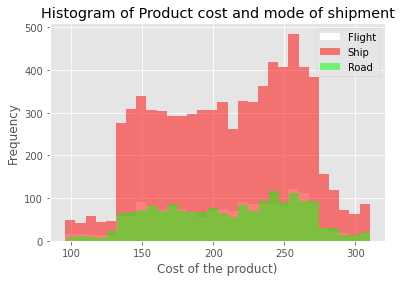

In [14]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Cost_of_the_Product,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Cost_of_the_Product,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Cost_of_the_Product,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Cost of the product)")
plt.ylabel("Frequency")
plt.title("Histogram of Product cost and mode of shipment")
plt.show()

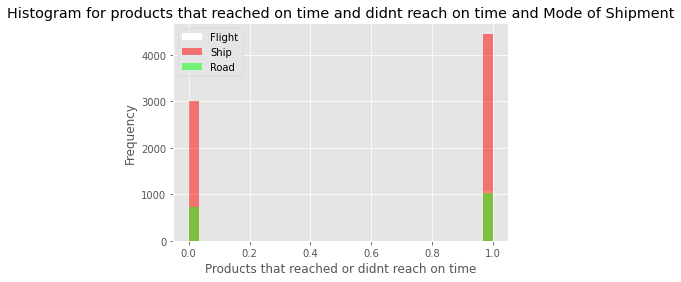

In [15]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].ROT_Y,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].ROT_Y,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].ROT_Y,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Products that reached or didnt reach on time")
plt.ylabel("Frequency")
plt.title("Histogram for products that reached on time and didnt reach on time and Mode of Shipment")
plt.show()

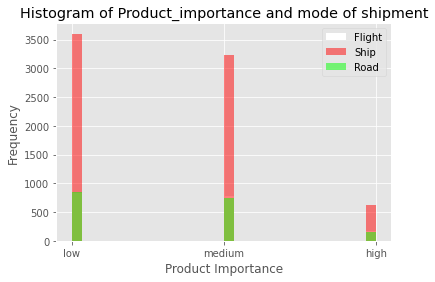

In [16]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Product_importance,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Product_importance,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Product_importance,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Product Importance")
plt.ylabel("Frequency")
plt.title("Histogram of Product_importance and mode of shipment")
plt.show()

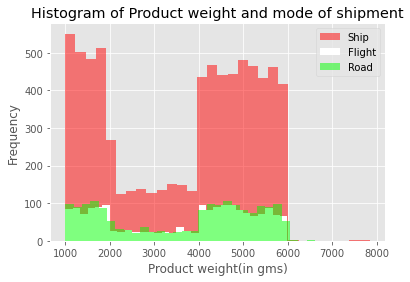

In [17]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Weight_in_gms,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Weight_in_gms,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Weight_in_gms,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Product weight(in gms)")
plt.ylabel("Frequency")
plt.title("Histogram of Product weight and mode of shipment")
plt.show()

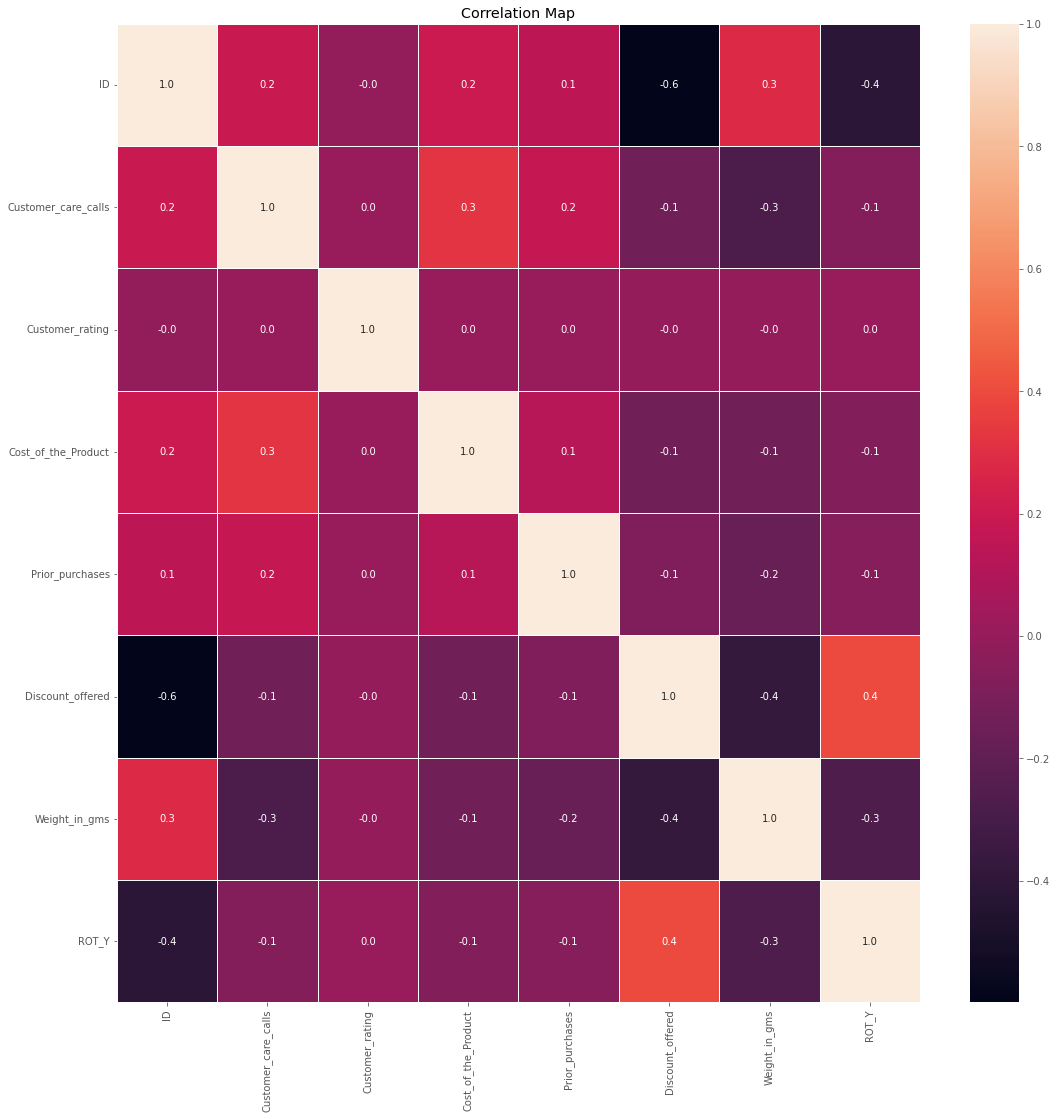

In [40]:
#The range of these numbers are -1 to 1.If the number is positive that indicates the two variables are positively correlated.A negative value indicates that there is negative correlation and zero means there is no correlation.
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

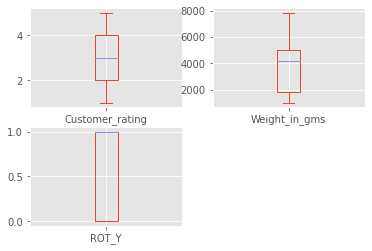

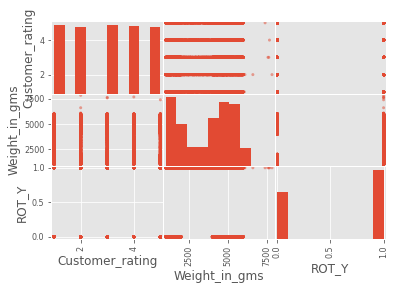

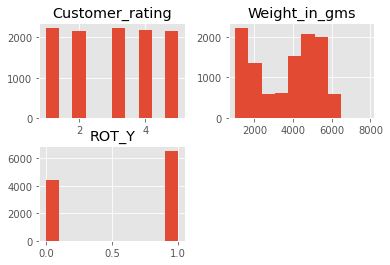

In [35]:
col_names = ['Mode_of_Shipment', 'Customer_rating','Product_importance','Weight_in_gms','ROT_Y']
dataset = data[col_names]
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()

In [36]:
# check missing values in variables
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64

In [37]:
#Frequency count of categorical variables
col_names = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance','Gender','ROT_Y']
for col in col_names:
    print(data[col].value_counts())   

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
F    5545
M    5454
Name: Gender, dtype: int64
1    6563
0    4436
Name: ROT_Y, dtype: int64


In [38]:
#The target variable is ROT_Y which has two value 0 amd 1,where 0 indicates it has reached on time and 1 indicates it hasnt reached on time
data['ROT_Y'].value_counts()

1    6563
0    4436
Name: ROT_Y, dtype: int64

In [48]:
#feature vector and target variable
X = data.drop(['ID','Cost_of_the_Product','Discount_offered','Weight_in_gms','ROT_Y'], axis=1)
y = data['ROT_Y']
# split data into 80:20 training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 7), (2200, 7))

In [49]:
# check data types in X_train
X_train.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Prior_purchases         int64
Product_importance     object
Gender                 object
dtype: object

In [46]:
# import category encoders
!pip install category-encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.0 MB/s eta 0:00:00


In [50]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance','Gender'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [51]:
X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender
8965,1,1,1,1,1,1,1
5936,2,1,2,2,2,2,1
10656,3,1,3,1,1,2,2
3328,4,1,4,1,3,2,2
9880,4,2,2,2,2,1,1


In [52]:
X_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender
107,1,1,5,1,1,3,2
5594,2,3,1,3,1,1,1
6997,1,2,1,4,2,1,1
3984,3,2,4,3,4,1,1
3111,5,1,4,5,3,2,1


In [53]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
#predict test results with gini index
y_pred_gini = clf_gini.predict(X_test)

In [55]:
#accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5932


In [56]:
#compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5976


In [57]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5976
Test set score: 0.5932


[Text(0.5, 0.875, 'x[4] <= 1.5\ngini = 0.481\nsamples = 8799\nvalue = [3541, 5258]'),
 Text(0.25, 0.625, 'x[2] <= 4.5\ngini = 0.459\nsamples = 3145\nvalue = [1120, 2025]'),
 Text(0.125, 0.375, 'x[2] <= 2.5\ngini = 0.45\nsamples = 1981\nvalue = [677, 1304]'),
 Text(0.0625, 0.125, 'gini = 0.46\nsamples = 1177\nvalue = [422, 755]'),
 Text(0.1875, 0.125, 'gini = 0.433\nsamples = 804\nvalue = [255, 549]'),
 Text(0.375, 0.375, 'x[3] <= 2.5\ngini = 0.471\nsamples = 1164\nvalue = [443, 721]'),
 Text(0.3125, 0.125, 'gini = 0.456\nsamples = 483\nvalue = [170, 313]'),
 Text(0.4375, 0.125, 'gini = 0.48\nsamples = 681\nvalue = [273, 408]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\ngini = 0.49\nsamples = 5654\nvalue = [2421, 3233]'),
 Text(0.625, 0.375, 'x[3] <= 3.5\ngini = 0.468\nsamples = 1433\nvalue = [535, 898]'),
 Text(0.5625, 0.125, 'gini = 0.458\nsamples = 889\nvalue = [315, 574]'),
 Text(0.6875, 0.125, 'gini = 0.482\nsamples = 544\nvalue = [220, 324]'),
 Text(0.875, 0.375, 'x[5] <= 2.5\ngini = 0.494

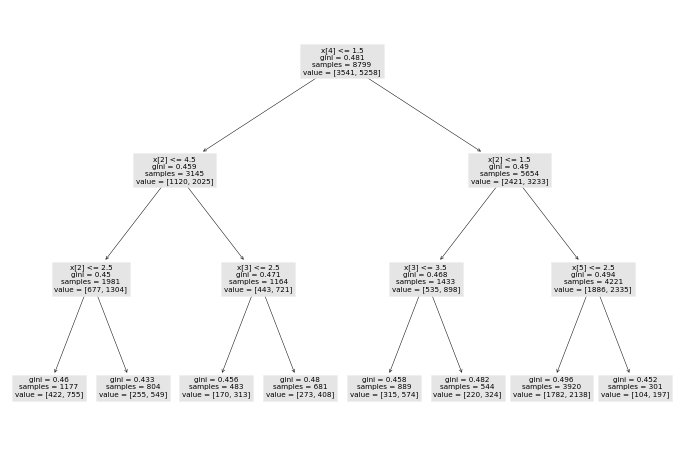

In [58]:
#visualize decision trees
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 